In [142]:
z = [2456]
a = 113
b = 2
m = 10000
for i in range(1, 100):
    z.append((a * z[i-1] + b) % m)
x = [z[i] / m for i in range (100)]
first10 = [x[i] for i in range (10)]
print(first10)


[0.2456, 0.753, 0.0892, 0.0798, 0.0176, 0.989, 0.7572, 0.5638, 0.7096, 0.185]


(0.0, 20.0)

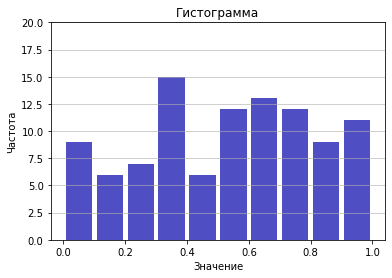

In [143]:
import numpy as np
import matplotlib.pyplot as plt



n, bins, patches = plt.hist(x=x, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма')
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [144]:
from scipy.stats import chi2
def CheckHypotesis(data):
    n = len(data)
    k = 10
    alpha = .05
    observedValues,_ = np.histogram(data, bins = k, range = (0, 1))
    expectedValues = [n / k] * k
    chi2_val = sum((observedValues - expectedValues)**2 / expectedValues)
    print(observedValues)
    print(expectedValues)
    print(chi2_val)
    print(chi2.ppf(1 - alpha, k - 1))

CheckHypotesis(x)

[ 9  6  7 15  6 12 13 12  9 11]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
8.6
16.918977604620448


[0.2456, 0.753, 0.0892, 0.0798, 0.0176, 0.989, 0.7572, 0.5638, 0.7096, 0.185]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
0.0
16.918977604620448


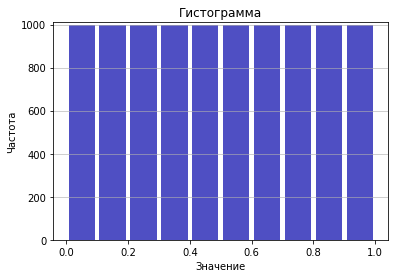

In [145]:
z = [2456]
for i in range(1, 10000):
    z.append((a * z[i-1] + b) % m)
x = [z[i] / m for i in range (10000)]
first10 = [x[i] for i in range (10)]
print(first10)
n, bins, patches = plt.hist(x=x, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма')
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

CheckHypotesis(x)

In [146]:
triples = []
triples = [[0] * 3 for i in range(3333)]
for i in range(0, 9999):
    triples[i // 3][i % 3] = x[i]
possibleArrays = [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
def CheckPosition(arr, nums, possibleArrays):
    maxValue = max(nums)
    minValue = min(nums)
    for i in range(3):
        if (nums[i] == maxValue): 
            nums[i] = 3
        elif (nums[i] == minValue):
            nums[i] = 1
        else: 
            nums[i] = 2
    for i in range(6):
        if (nums == possibleArrays[i]):
            arr[i] += 1


def CheckHypotesis2(data):
    n = 3333
    k = 6
    alpha = .05
    observedValues = [0, 0, 0, 0, 0, 0]
    for i in range(3333):
        CheckPosition(observedValues, data[i], possibleArrays)
    # Проверка на повторы, если сумма равна 3333, то всё нормально. Если нет, то есть равные значения в тройках.
    print(sum(observedValues))
    expectedValues = [n / k] * k
    print(observedValues)
    print(expectedValues)
    chi2_val = sum((np.array(observedValues) - np.array(expectedValues))**2 / expectedValues)
    print(chi2_val)
    print(chi2.ppf(1 - alpha, k - 1))

CheckHypotesis2(triples)

3333
[570, 564, 533, 548, 549, 569]
[555.5, 555.5, 555.5, 555.5, 555.5, 555.5]
1.925292529252925
11.070497693516351
